# Dependencies Loading

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import pickle
from joblib import dump, load

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

np.random.seed(2024)
pd.set_option("display.max_columns", 500)

## Loading models

In [3]:
lr = load('../models/Logistic_Regression.joblib')
knn = load('../models/KNeighborsClassifier.joblib')
clf = load('../models/SupportVectorClassification.joblib')
rf = load('../models/RandomForestClassifier.joblib')

## Loading test data

In [4]:
data_test = pd.read_csv('../input_data/fe_X_test.csv',index_col=0)
y_test = pd.read_csv('../input_data/y_test.csv',index_col=0)
sca_data_test = pd.read_csv('../input_data/scal_fe_X_test.csv',index_col=0)

In [5]:
data_test

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Avg_Transaction,Credit_utilization
0,56.0,2.0,0.0,0.0,0.0,42.0,4.0,2.0,2.0,3495.0,1427.0,2068.0,0.563,4466.0,85.0,0.889,0.408,0.0,0.0,False,False,False,8.404248,8.159089,3.961597,52.541176,0.149044
1,47.0,4.0,2.0,1.0,0.0,35.0,6.0,1.0,2.0,3560.0,751.0,2809.0,1.096,4060.0,79.0,0.975,0.211,0.0,0.0,False,False,False,8.308938,8.177516,3.939490,51.392405,0.066555
2,42.0,2.0,0.0,2.0,0.0,32.0,5.0,5.0,3.0,4708.0,0.0,4708.0,0.718,4597.0,89.0,0.679,0.000,0.0,1.0,False,False,False,8.433159,8.457018,3.944523,51.651685,0.178490
3,45.0,4.0,3.0,0.0,0.0,38.0,2.0,2.0,1.0,2396.0,887.0,1509.0,0.604,7480.0,84.0,0.787,0.370,0.0,0.0,False,False,False,8.919988,7.781556,4.489171,89.047619,0.514496
4,51.0,3.0,3.0,0.0,0.0,30.0,3.0,2.0,0.0,6006.0,1576.0,4430.0,0.504,3199.0,65.0,0.548,0.262,1.0,0.0,False,False,False,8.070594,8.700514,3.896206,49.215385,0.042792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,48.0,4.0,3.0,1.0,0.0,40.0,3.0,3.0,3.0,2300.0,1906.0,394.0,0.803,4538.0,71.0,0.868,0.829,0.0,1.0,False,False,False,8.420242,7.740664,4.157562,63.915493,0.472780
2022,37.0,2.0,1.0,0.0,0.0,28.0,5.0,2.0,1.0,7411.0,633.0,6778.0,0.762,2761.0,77.0,0.604,0.085,0.0,0.0,False,False,False,7.923348,8.910721,3.579543,35.857143,0.000000
2023,32.0,0.0,4.0,2.0,0.0,25.0,6.0,2.0,2.0,4469.0,2331.0,2138.0,1.006,8314.0,67.0,0.763,0.522,0.0,0.0,True,True,False,9.025696,8.404920,4.821004,124.089552,0.016989
2024,54.0,2.0,3.0,0.0,0.0,45.0,5.0,2.0,4.0,2683.0,1671.0,1012.0,0.784,1406.0,37.0,0.423,0.623,0.0,0.0,True,True,False,7.248504,7.894691,3.637586,38.000000,0.101143


In [6]:
y_test

,Attrition_Flag
8061,0
4318,0
7714,0
9015,0
3608,0
...,...
7301,0
2566,0
9747,1
1692,0


In [7]:
sca_data_test

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Gender_M,MS_Married,MS_Single,ln_Total_Trans_Amt,ln_Credit_Limit,ln_Avg_Transaction,Avg_Transaction,Credit_utilization
0,1.282105,-0.298120,-1.662661,-1.055703,-0.254378,0.802416,0.270581,-0.514830,-0.635643,-0.542249,0.515630,-0.592564,-0.810789,0.185091,1.255258,1.024673,0.647128,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,0.558114,-0.428992,-0.320276,-0.399508,-0.288025
1,0.064089,1.349892,-0.090184,-0.282623,-0.254378,-0.142324,1.614713,-1.589744,-0.635643,-0.535132,-0.239953,-0.511467,1.756614,0.052646,0.985979,1.392904,-0.064285,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,0.413632,-0.409539,-0.382679,-0.442541,-0.585914
2,-0.612586,-0.298120,-1.662661,0.490456,-0.254378,-0.547213,0.942647,2.709912,0.316978,-0.409452,-1.079364,-0.303635,-0.064171,0.227826,1.434778,0.125504,-0.826254,-0.460763,3.073315,-0.931313,-1.060200,-0.803399,0.601940,-0.114472,-0.368473,-0.432829,-0.181687
3,-0.206581,1.349892,0.696055,-1.055703,-0.254378,0.262564,-1.073551,-0.514830,-1.588265,-0.662564,-0.087942,-0.653742,-0.613296,1.168316,1.210379,0.587934,0.509901,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,1.339930,-0.827548,1.168954,0.968022,1.031726
4,0.605430,0.525886,0.696055,-1.055703,-0.254378,-0.817139,-0.401485,-0.514830,-2.540887,-0.267351,0.682171,-0.334060,-1.094985,-0.228229,0.357660,-0.435406,0.119888,2.529741,-0.374219,-0.931313,-1.060200,-0.803399,0.052322,0.142583,-0.504860,-0.524092,-0.671730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.199425,1.349892,0.696055,-0.282623,-0.254378,0.532490,-0.401485,0.560084,0.316978,-0.673074,1.051020,-0.775770,0.345265,0.208579,0.626940,0.934756,2.167456,-0.460763,3.073315,-0.931313,-1.060200,-0.803399,0.582358,-0.870717,0.232891,0.026573,0.881078
2022,-1.289261,-0.298120,-0.876422,-1.055703,-0.254378,-1.087064,0.942647,-0.514830,-1.588265,-0.113535,-0.371844,-0.077089,0.147772,-0.371113,0.896219,-0.195628,-0.519300,-0.460763,-0.374219,-0.931313,-1.060200,-0.803399,-0.170889,0.364495,-1.398734,-1.024492,-0.826263
2023,-1.965936,-1.946132,1.482293,0.490456,-0.254378,-1.491953,1.614713,-0.514830,-0.635643,-0.435617,1.526054,-0.584903,1.323093,1.440383,0.447420,0.485171,1.058808,-0.460763,-0.374219,1.073753,0.943218,-0.803399,1.500174,-0.169472,2.105645,2.280691,-0.764911
2024,1.011435,-0.298120,0.696055,-1.055703,-0.254378,1.207304,0.942647,-0.514830,1.269600,-0.631144,0.788355,-0.708135,0.253744,-0.813140,-0.898977,-0.970625,1.423542,-0.460763,-0.374219,1.073753,0.943218,-0.803399,-1.193894,-0.708113,-1.234890,-0.944220,-0.461009


# Models

Now we are going to test our models on test data.

In [8]:
FE_columns = ['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Education_Level_NA',
 'Income_Category_NA',
 'Gender_M',
 'MS_Married',
 'MS_Single',
 'ln_Total_Trans_Amt',
 'ln_Credit_Limit',
 'ln_Avg_Transaction',
 'Credit_utilization']

In [9]:
def scores(model,y_true,y_pred):
    return {"model":model,
    "f1_score":[f1_score(y_true,y_pred)],
    "matthews_corrcoef":[matthews_corrcoef(y_true,y_pred)],
    "roc_auc":[roc_auc_score(y_true,y_pred)]
    }
    

## Logistic Regression

In [10]:
lr

LogisticRegression(C=1, max_iter=5000)

In [11]:
pred = pd.DataFrame(lr.predict(data_test), columns=["LR_pred"])

In [12]:
pred['LR_proba'] = pd.DataFrame(lr.predict_proba(data_test)[:,1])

In [13]:
pred['true'] = y_test.values

In [14]:
pd.DataFrame(scores('Logistic Regression',y_test,pred['LR_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,Logistic Regression,0.665706,0.598704,0.81482


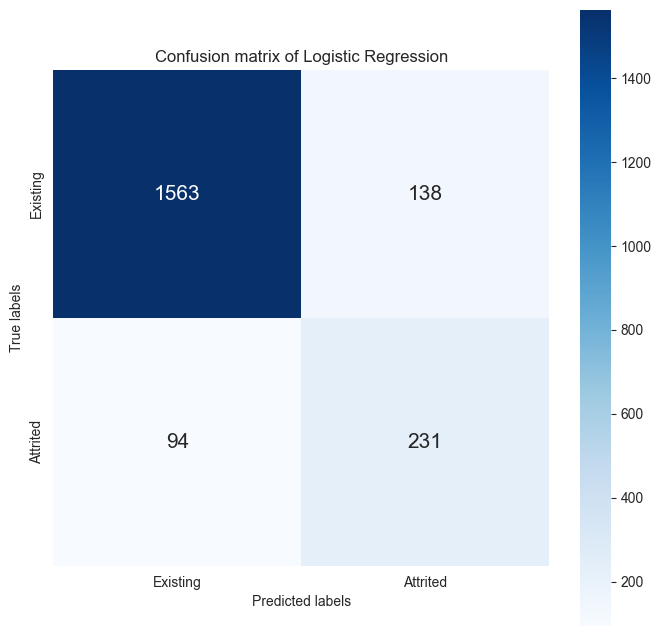

In [15]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['LR_pred']).round(),annot=True, square=True, fmt=".0f", annot_kws={"size": 15},cmap = 'Blues')
plt.title("Confusion matrix of Logistic Regression")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

Above we can see confusion matrix. 
A confusion matrix is a table that is often used to evaluate the performance of a classification model. It compares the predicted classifications of a model with the actual true classifications, breaking down the results into four categories:

True Positive (TP): Instances that are actually positive and are correctly predicted as positive by the model.

True Negative (TN): Instances that are actually negative and are correctly predicted as negative by the model.

False Positive (FP): Instances that are actually negative but are incorrectly predicted as positive by the model (Type I error).

False Negative (FN): Instances that are actually positive but are incorrectly predicted as negative by the model (Type II error).

We are mostly interested with True Positive, that means with custometrs that we predicted that they will be attrited and that they actually attrited.

In logistic regression we correctly predicted 231  actually attrited attrited customers.

## KNN

In [16]:
knn

KNeighborsClassifier(n_neighbors=2)

In [17]:
pred['KNN_pred'] = pd.DataFrame(knn.predict(sca_data_test))
pred['KNN_proba'] = pd.DataFrame(knn.predict_proba(sca_data_test)[:,1])

In [18]:
pd.DataFrame(scores('K-Nearest Neighbors',y_test,pred['KNN_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,K-Nearest Neighbors,0.653571,0.610291,0.766253


In [19]:
confusion_matrix(pred["true"], pred['KNN_pred'])/pred.shape[0]

array([[0.81391905, 0.02566634],
       [0.07008885, 0.09032577]])

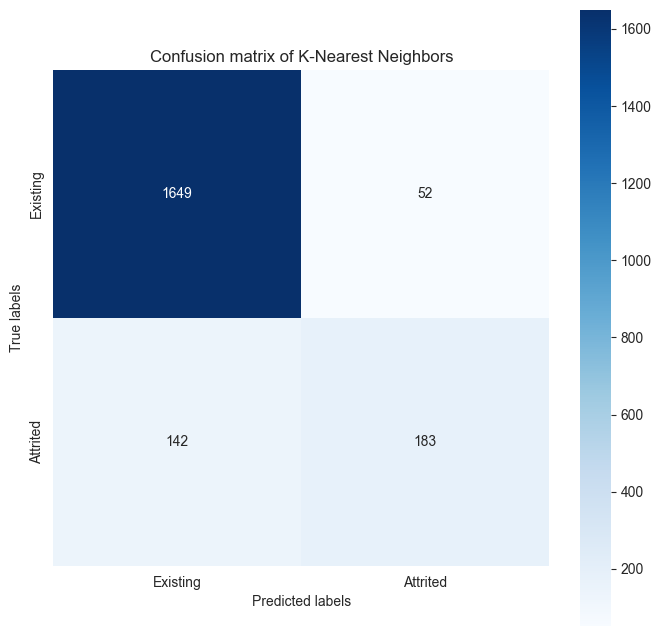

In [20]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['KNN_pred']),annot=True, square=True, fmt=".0f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of K-Nearest Neighbors")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

In KNN model we predicted only 183 attrited custromers correctly and that is less than in logistic regression.

## SVC

In [21]:
clf

SVC(C=10, gamma=0.1, probability=True)

In [22]:
pred['SVC_pred'] = pd.DataFrame(clf.predict(sca_data_test))
pred['SVC_proba'] = pd.DataFrame(clf.predict_proba(sca_data_test)[:,1])

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [23]:
pd.DataFrame(scores('Support Vector Classifier',y_test,pred['SVC_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,Support Vector Classifier,0.75,0.717414,0.82202


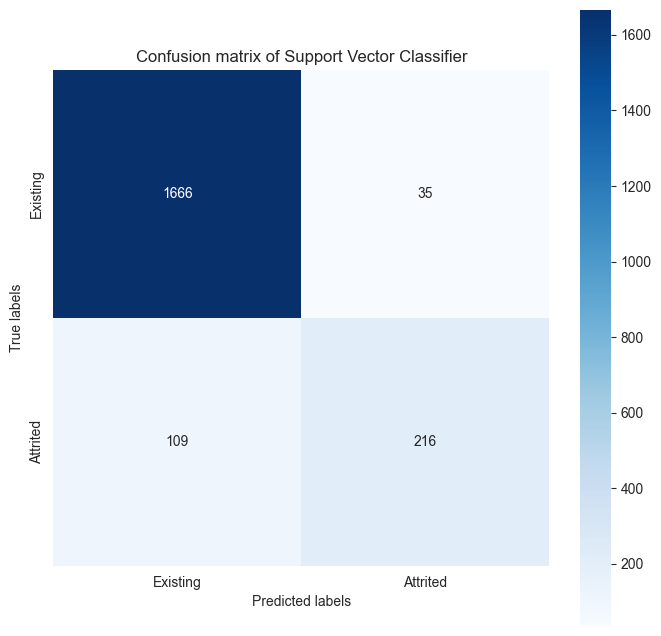

In [24]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['SVC_pred']),annot=True, square=True, fmt=".0f", annot_kws={"size": 10},cmap = 'Blues')
plt.title("Confusion matrix of Support Vector Classifier")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

In SVC model we predicted only 216 attrited custromers correctly and that is less than in logistic regression.

## Random Forest

In [25]:
rf

RandomForestClassifier(random_state=2024)

In [26]:
pred['RF_pred'] = pd.DataFrame(rf.predict(data_test[FE_columns]))
pred['RF_proba'] = pd.DataFrame(rf.predict_proba(data_test[FE_columns])[:,1])

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
pd.DataFrame(scores('RF',y_test,pred['RF_pred']))

,model,f1_score,matthews_corrcoef,roc_auc
0,RF,0.866769,0.841186,0.922157


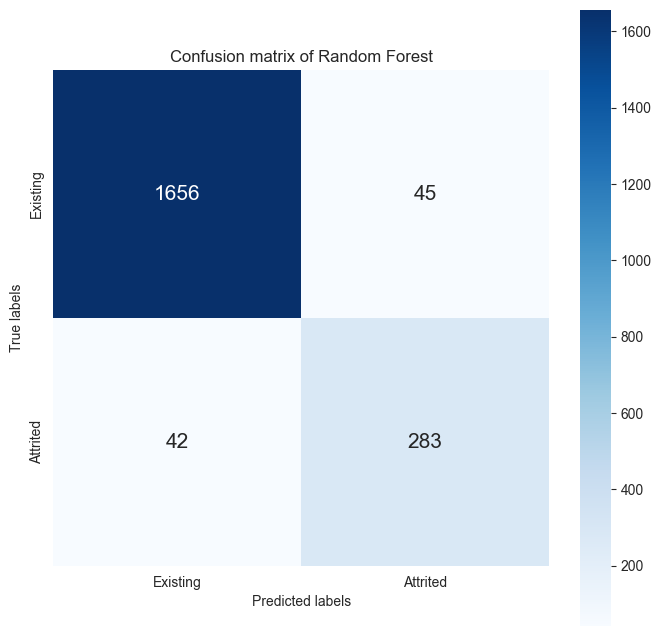

In [28]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(8, 8))
g = sns.heatmap(confusion_matrix(pred["true"], pred['RF_pred']),annot=True, square=True, fmt=".0f", annot_kws={"size": 15},cmap = 'Blues')
plt.title("Confusion matrix of Random Forest")
g.set_xlabel('Predicted labels')
g.set_ylabel('True labels'); 
g.xaxis.set_ticklabels(['Existing', 'Attrited'])
g.yaxis.set_ticklabels(['Existing', 'Attrited'])
plt.show()

IN Random Forest we predicted 283 attrited custromers correctly and that is better in comparison to the rest of the models.


# Model comparision

In [29]:
results = pd.concat([pd.DataFrame(scores('Logistic Regression',y_test,pred['LR_pred'])),
           pd.DataFrame(scores('K-Nearest Neighbors',y_test,pred['KNN_pred'])),
           pd.DataFrame(scores('Support Vector Classifier',y_test,pred['SVC_pred'])),
           pd.DataFrame(scores('Random Forest',y_test,pred['RF_pred']))
           ])

In [30]:
pred

,LR_pred,LR_proba,true,KNN_pred,KNN_proba,SVC_pred,SVC_proba,RF_pred,RF_proba
0,0,0.002123,0,0,0.0,0,1.000000e-07,0,0.00
1,0,0.000706,0,0,0.0,0,1.440162e-04,0,0.00
2,0,0.034957,0,0,0.0,0,1.225184e-04,0,0.09
3,0,0.030988,0,0,0.0,0,3.893709e-07,0,0.01
4,0,0.009707,0,0,0.0,0,2.080741e-03,0,0.03
...,...,...,...,...,...,...,...,...,...
2021,0,0.066721,0,0,0.0,0,2.566181e-04,0,0.00
2022,0,0.001205,0,0,0.5,0,2.770779e-05,0,0.11
2023,0,0.396426,1,1,1.0,1,9.504737e-01,1,0.78
2024,1,0.610951,0,0,0.5,0,2.825300e-03,0,0.16


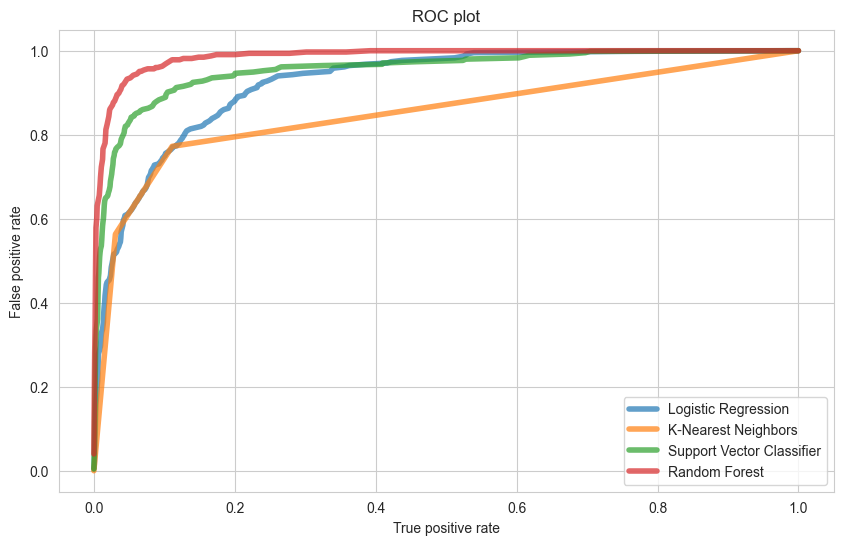

In [34]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(10, 6))
sns.lineplot(x = roc_curve(pred['true'],pred['LR_proba'])[0], y = roc_curve(pred['true'],pred['LR_proba'])[1], errorbar = None, linewidth = 4, alpha = 0.7)
sns.lineplot(x = roc_curve(pred['true'],pred['KNN_proba'])[0], y = roc_curve(pred['true'],pred['KNN_proba'])[1], errorbar = None, linewidth = 4, alpha = 0.7)
sns.lineplot(x = roc_curve(pred['true'],pred['SVC_proba'])[0], y = roc_curve(pred['true'],pred['SVC_proba'])[1], errorbar = None, linewidth = 4, alpha = 0.7)
sns.lineplot(x = roc_curve(pred['true'],pred['RF_proba'])[0], y = roc_curve(pred['true'],pred['RF_proba'])[1], errorbar = None, linewidth = 4, alpha = 0.7)
plt.legend(['Logistic Regression','K-Nearest Neighbors','Support Vector Classifier','Random Forest' ])
plt.title("ROC plot")
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.show()

In [32]:
results

,model,f1_score,matthews_corrcoef,roc_auc
0,Logistic Regression,0.665706,0.598704,0.814820
0,K-Nearest Neighbors,0.653571,0.610291,0.766253
0,Support Vector Classifier,0.750000,0.717414,0.822020
0,Random Forest,0.866769,0.841186,0.922157


/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_65842/3909213351.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(labels = results['model'] ,rotation = 30)
/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_65842/3909213351.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels = results['model'] ,rotation = 30)
/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_65842/3909213351.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(labels = results['model'] ,rotation = 30)


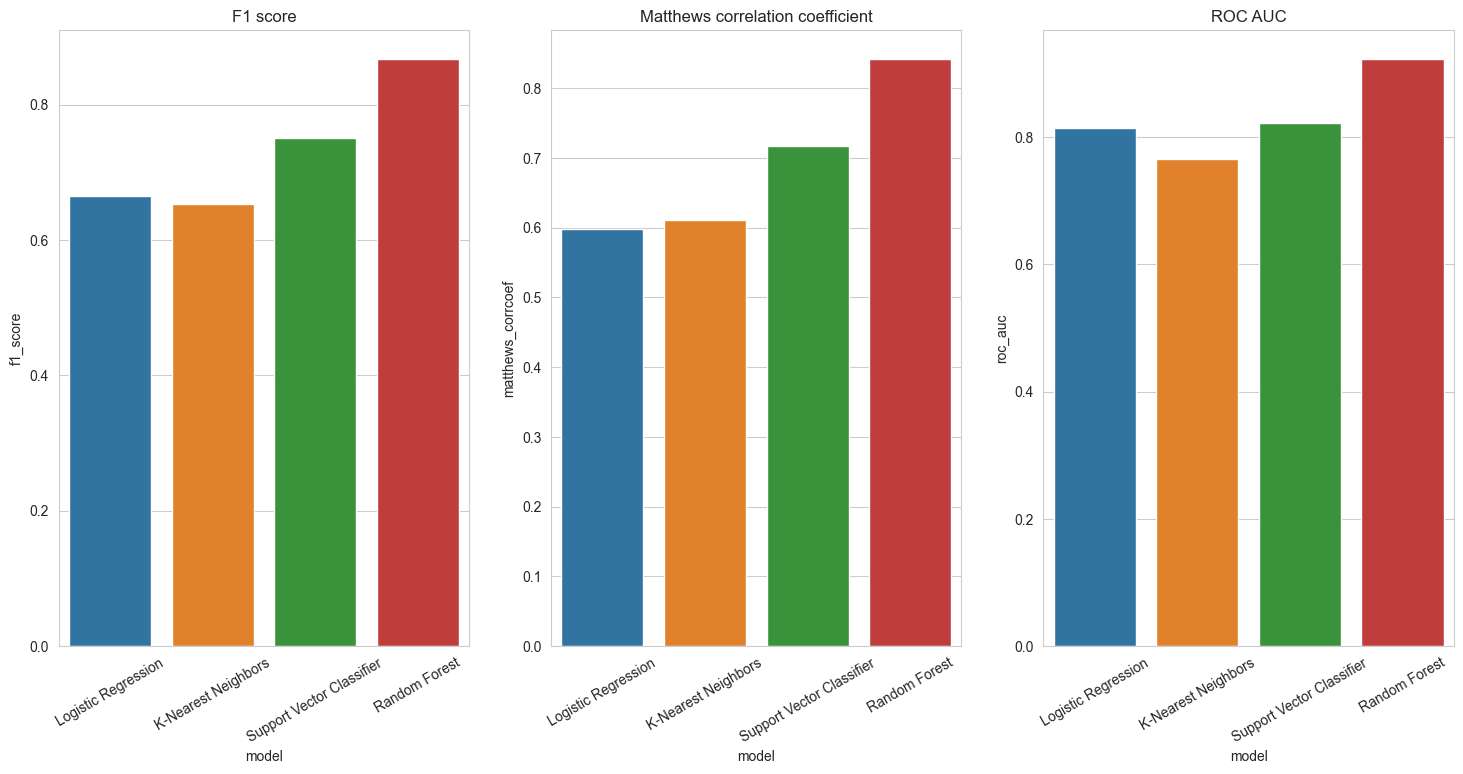

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18,8))
sns.barplot(results,x = 'model', y = 'f1_score', hue = 'model', ax = axs[0])
axs[0].set_title('F1 score')
axs[0].set_xticklabels(labels = results['model'] ,rotation = 30)
sns.barplot(results,x = 'model', y = 'matthews_corrcoef', hue = 'model', ax = axs[1])
axs[1].set_title('Matthews correlation coefficient')
axs[1].set_xticklabels(labels = results['model'] ,rotation = 30)
sns.barplot(results,x = 'model', y = 'roc_auc', hue = 'model', ax = axs[2])
axs[2].set_title('ROC AUC')
axs[2].set_xticklabels(labels = results['model'] ,rotation = 30)
plt.show()

# Final summary

- The F1 score and Matthews correlation coefficient statistics show the highest values in the Random Forest model. F1 score was equal to 0.866769	and matthews_corrcoef equal to 0.841186,

- Additionally, Random Forest correctly identified the highest number of customers(238) who actually churned from the bank services. 

- In almost every model, the best results were achieved with data augmented using the SMOTE method. That is because our data was highly imbalanced.

- For the Random Forest, it was beneficial to reduce the number of variables when training the model what was confirmed by the test statistics.

- Based on this, we can conclude that the Random Forest model is the most effective method for our database.